<a href="https://colab.research.google.com/github/PerezTorresJhoyceR/IA_Sis420/blob/main/Laboratorio1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive
Cantidad total de ejemplos: 17379


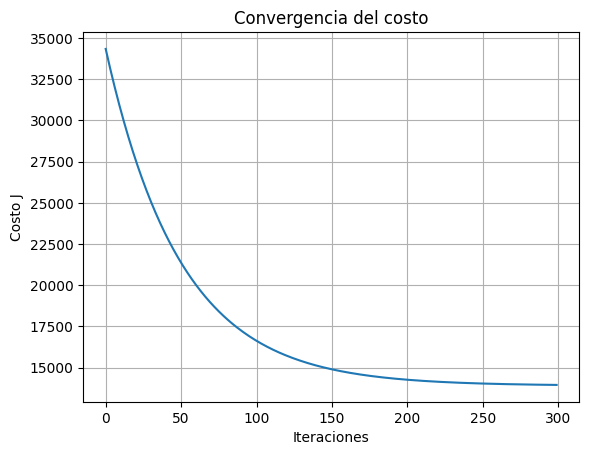

Theta final: [181.10561889  69.8585486 ]
Costo en entrenamiento: 13948.00946551756
Costo en prueba: 13187.516135374026
Predicción para temp=0.45: 164.05838191327


In [8]:
#  Librerías
import numpy as np
import pandas as pd
from matplotlib import pyplot
from google.colab import drive
from sklearn.model_selection import train_test_split

#  Montar Drive
drive.mount("/content/drive", force_remount=True)

#  Cargar dataset
df = pd.read_csv('/content/drive/MyDrive/IA/hour.csv')

#  Seleccionar variable independiente y dependiente
X = df[['temp']].values         # Solo una variable: temperatura
y = df['cnt'].values            # Variable objetivo: cantidad de alquileres
m = y.size
print("Cantidad total de ejemplos:", m)

#  Normalización
def featureNormalize(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

X_norm, mu, sigma = featureNormalize(X)

#  Añadir columna de unos
X_all = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

# División 80/20
X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=0.2, random_state=42)

#  Función de costo
def computeCost(X, y, theta):
    m = y.shape[0]
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    return J

# 🔁 Descenso por el gradiente
def gradientDescent(X, y, theta, alpha, num_iters):
    m = y.shape[0]
    J_history = []

    for i in range(num_iters):
        error = np.dot(X, theta) - y
        gradient = (alpha / m) * np.dot(X.T, error)
        theta -= gradient
        J_history.append(computeCost(X, y, theta))

    return theta, J_history

# Inicializar
theta = np.zeros(2)
alpha = 0.01
num_iters = 300

#  Entrenar
theta, J_history = gradientDescent(X_train, y_train, theta, alpha, num_iters)

# Graficar costo
pyplot.plot(np.arange(len(J_history)), J_history)
pyplot.xlabel('Iteraciones')
pyplot.ylabel('Costo J')
pyplot.title('Convergencia del costo')
pyplot.grid(True)
pyplot.show()

#  Resultados
print("Theta final:", theta)
print("Costo en entrenamiento:", computeCost(X_train, y_train, theta))
print("Costo en prueba:", computeCost(X_test, y_test, theta))

#  Predicción ejemplo
temp_ficticia = 0.45  # temperatura en escala original (0 a 1)
temp_norm = (temp_ficticia - mu) / sigma
X_pred = np.array([1, temp_norm[0]])
predicted_count = np.dot(X_pred, theta)
print("Predicción para temp=0.45:", predicted_count)
